# Inter-Class

> Relationship between different classes

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
from sklearn.decomposition import PCA
from scipy.stats import norm
from fastai.vision.all import *

from similarity_learning.all import *

from Few_Shot_Feature_Space.utils import *

In [ ]:
def per_component_hist(xs):
    pca = PCA()
    pca.fit(xs.cpu())
    
    fig, axs = plt.subplots(4, 1)
    fig.tight_layout()
    
    comp_idxs = [i*pca.n_components_//(len(axs)-1) for i in range(len(axs)-1)] + [pca.n_components_-1]
    for comp_idx, ax in zip(comp_idxs, axs):
        dir = Tensor(pca.components_[comp_idx]).cuda()
        angles = (xs @ dir).cpu()
        _, bins, _ = ax.hist(angles, bins='auto', label='Angle', alpha=.5, edgecolor='black', density=True)
        mu, sigma = norm.fit(angles)
        y = norm.pdf(bins, mu, sigma)
        ax.plot(bins, y)
        ax.set_title(f'Component #{comp_idx+1} out of {pca.n_components_}')

## Class Means

In [ ]:
def plot(dl, fe):
    class_ftrs = ClassFeatures.compute(dl, fe)
    centroids = torch.stack([f.centroid for f in class_ftrs.values()])
    per_component_hist(centroids)

In [ ]:
vggface2_fe = cut_model_by_name(FaceNetInceptionResnetV1('vggface2', classify=False), 'last_bn')
casia_webface_fe = cut_model_by_name(FaceNetInceptionResnetV1('casia-webface', classify=False), 'last_bn')

lfw_dl = dls = LFWPeople().all().train.dl()
pfr_dl = PinterestFaces(splitter=IndexSplitter([])).train.dl()

## VGGFace2

### LFW

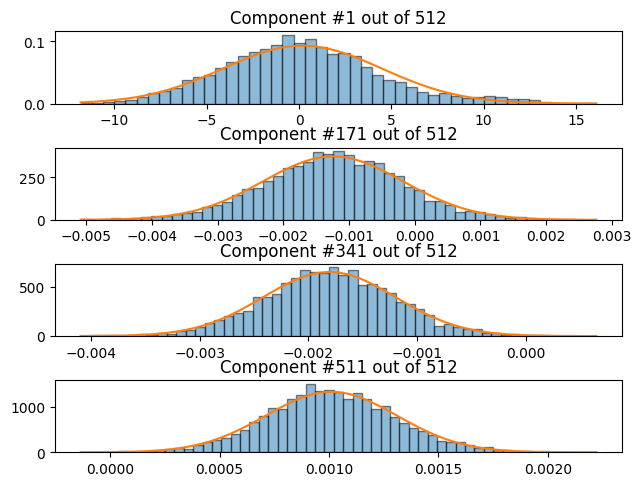

In [ ]:
plot(lfw_dl, vggface2_fe)

### PFR

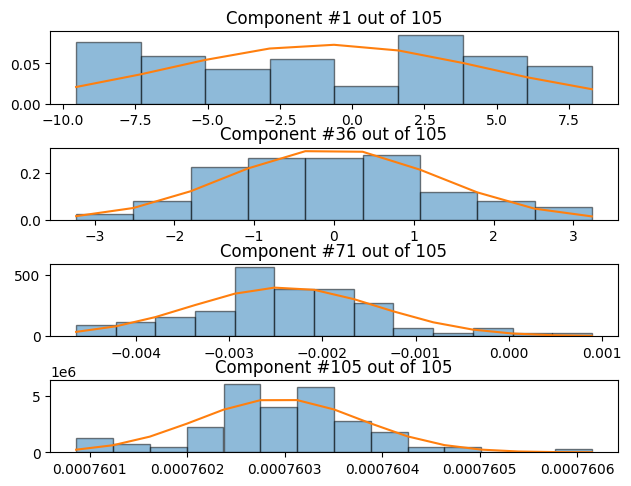

In [ ]:
plot(pfr_dl, vggface2_fe)

## CASIA-WebFace

### LFW

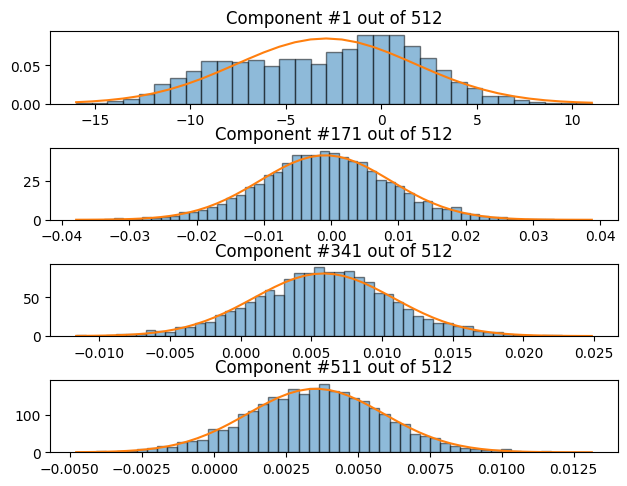

In [ ]:
plot(lfw_dl, casia_webface_fe)

### PFR

In [ ]:
plot(pfr_dl, casia_webface_fe)